# CyberInsight: Visualizing Modern Cybersecurity Threats

## Introduction

The **CyberInsight** project aims to explore and visualize the landscape of modern cybersecurity threats through data-driven storytelling. By analyzing real-world data on various types of cyberattacks, such as malware, phishing, denial-of-service, and supply chain attacks, this project reveals patterns in attack frequency, severity, and targeted industries. 

Using Python based visualizations, we derive meaningful insights about how these threats evolve over time, how they affect different sectors, and what trends emerge from the data. Our goal is to make these complex patterns understandable through clear, annotated charts and interactive visual formats.

This work not only highlights the growing scale of cybersecurity risks but also empowers stakeholders to make informed decisions based on visual evidence.


## Load Data and Libraries

In [91]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("A_Global_Cybersecurity_Threats_2015-2024.csv")

# Display the first 5 rows
df.head()


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


## Box Plot:  Resolution Time by Defense Mechanism

#### Introduction

This plot elaborates how different cybersecurity defense mechanisms influence the time it takes to resolve incidents. Specifically, it compares the median resolution time (in hours) for five strategies: VPN, Firewall, AI-based Detection, Antivirus, and Encryption.

This individual visualization is to identify whether any defense method stands out as significantly faster or more consistent in resolving attacks. By using a box plot format, this graph offers more than just averages, it reveals the spread, consistency, and potential outliers in how long each defense type takes to resolve an incident.




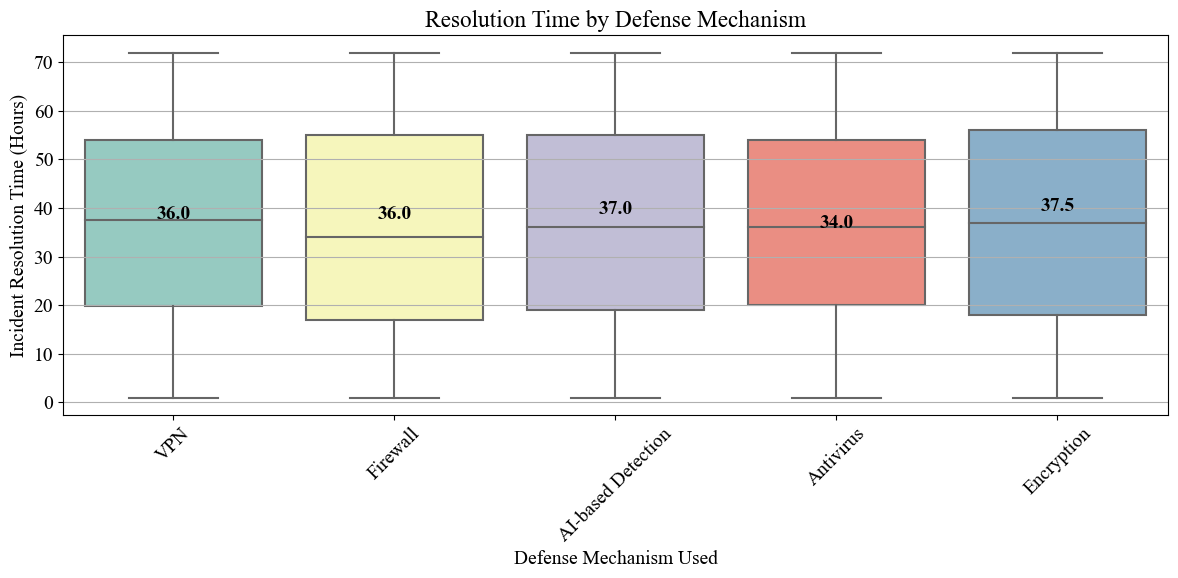

In [141]:

# Font style
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 14})

# Create the figure and boxplot
plt.figure(figsize=(12, 6))
box = sns.boxplot(
    data=df,
    x='Defense Mechanism Used',
    y='Incident Resolution Time (in Hours)',
    palette='Set3'
)

# Add title and axis labels
plt.title("Resolution Time by Defense Mechanism")
plt.ylabel("Incident Resolution Time (Hours)")
plt.xlabel("Defense Mechanism Used")
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# Annotate the median values on each box
grouped = df.groupby("Defense Mechanism Used")["Incident Resolution Time (in Hours)"]
medians = grouped.median().values
positions = range(len(medians))

for pos, median in zip(positions, medians):
    plt.text(pos, median + 1, f'{median:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

# Save the plot
plt.savefig("Chakar_ResolutionTime_BoxPlot.png", dpi=300)
plt.show()


## Insight: Impact of Defense Mechanisms on Incident Resolution Time

### Purpose of the Visualization

This box plot examines how different cybersecurity defense mechanisms influence the time it takes to resolve security incidents. The comparison includes five commonly used strategies: VPN, Firewall, AI-based Detection, Antivirus, and Encryption. The goal is to assess whether certain approaches lead to faster or more consistent resolution times.

### Interpreting the Box Plot

Each box represents the distribution of resolution times for a given defense method. The horizontal line within each box indicates the median, providing a central reference point for comparison. The height of the box (interquartile range) shows where the middle 50 percent of observations fall, while the whiskers extend to capture the broader range of values. Median values are also annotated directly on the plot to make comparisons more accessible.

Although the median resolution times for these methods fall within a narrow range approximately 34 to 37.5 hours the plot reveals subtle distinctions. Antivirus solutions show the lowest median time at 34 hours, suggesting a slight advantage in resolution speed. AI-based Detection and Encryption trend slightly higher, with medians of 37.0 and 37.5 hours, respectively. VPN and Firewall demonstrate a bit more consistency, as indicated by their tighter interquartile ranges.

### Importance

Incident response time is a critical factor in cybersecurity. This visualization addresses the question of whether the choice of defense mechanism significantly influences how quickly incidents can be resolved. Even small differences in response efficiency can impact organizational risk, especially in time sensitive scenarios.

The data presented here can help IT and security teams make more informed decisions about where to allocate resources. For example, leaders may weigh whether newer technologies like AI-based tools provide measurable improvements over traditional systems, or whether trieda and true methods like Antivirus and Firewalls remain competitive in practical terms.

### Key Takeaways

- Antivirus systems show the lowest median resolution time, at 34 hours.
- AI-based Detection and Encryption exhibit the highest medians, at 37.0 and 37.5 hours, though the overall range is relatively narrow.
- All defense methods display similar variability in resolution times, indicating that the choice of mechanism may not drastically alter the time required to address incidents.
- Annotated median values enhance the clarity of the visualization, enabling straightforward comparisons.

### Conclusion

While no single defense strategy appears to drastically outperform the others in reducing resolution time, Antivirus may offer a slight operational advantage. However, it is important to consider other performance factors such as detection accuracy, false positive rates, and adaptability to emerging threats. This visualization provides a meaningful starting point for evaluating whether investment in newer technologies is translating into tangible gains in resolution efficiency.


# Stacked Bar: Relation Between Attack Types and Countries
#### Introduction

The purpose of this stacked bar chart is to examine the relationship between **country** and **types of cybersecurity attacks**, focusing on how different forms of attacks like Phishing, Ransomware, and DDoS are distributed across various nations.

The visualization uses two key attributes from the dataset:
- `Country`: plotted along the x-axis to represent geographic regions.
- `Attack Type`: used to define each color segment stacked on the bars.

The height of each bar shows the total number of incidents reported for that country, while the color-coded segments illustrate how those incidents break down by attack type. The use of the colormap makes each attack type easily distinguishable, supporting clear visual comparison across categories.


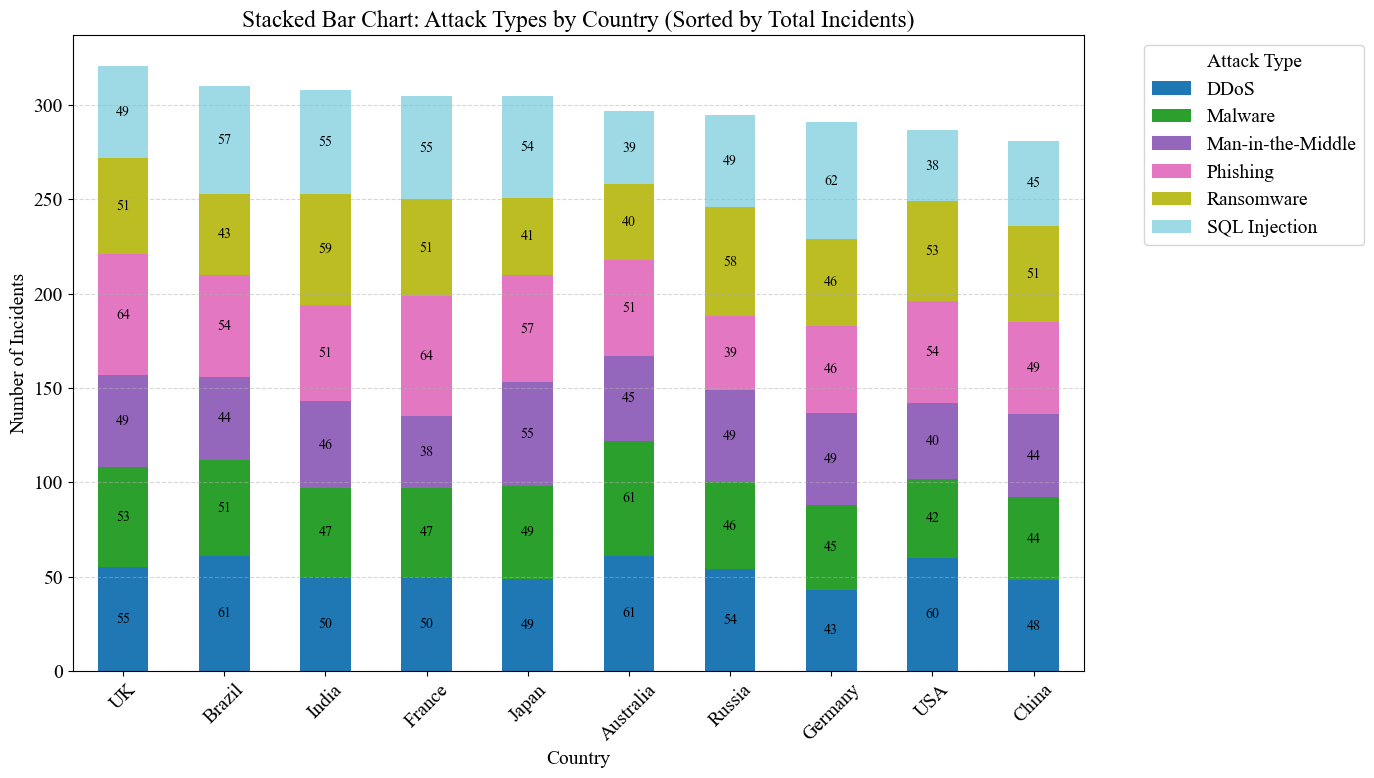

In [139]:

# clean dataset
df = df.dropna(subset=['Country', 'Attack Type'])

# Create pivot table: Rows = Country, Columns = Attack Types, Values = Count of Attacks
attack_counts = df.pivot_table(index='Country', columns='Attack Type', aggfunc='size', fill_value=0)

# Add 'Total' column for sorting by total attacks
attack_counts['Total'] = attack_counts.sum(axis=1)

# Sort by total attacks (descending), then remove the 'Total' column
attack_counts = attack_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Font style
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 14})

# Plot the stacked bar chart
ax = attack_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    colormap='tab20'
)

# Set title and axis labels
plt.title("Stacked Bar Chart: Attack Types by Country (Sorted by Total Incidents)")
plt.xlabel("Country")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add data labels (annotations) for each bar stack
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)

# Adjust legend and layout
plt.legend(title="Attack Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot with your name and plot type
plt.savefig("Chakar_StackedBar_AttackTypes.png", dpi=300)
plt.show()


## Insight: Distribution of Cyberattack Types Across Countries

### Purpose of the Visualization

This stacked bar chart presents a comparison of the total number of cyberattack incidents by country, broken down by attack type. The countries are sorted in descending order based on the overall volume of incidents. This visualization helps identify which nations face the highest number of attacks, and which types of attacks are most prevalent in each case.

### Interpreting the Stacked Bar Chart

Each bar represents the total number of recorded cybersecurity incidents for a specific country. The segments within each bar are color-coded according to attack type such as DDoS, Malware, Man-in-the-Middle, Phishing, Ransomware, and SQL Injection.

To enhance readability, the chart includes numeric labels at the center of each segment, indicating the count of incidents per attack type. The countries are sorted from highest to lowest based on the total number of incidents, allowing for immediate visual comparison across regions.

Although the overall number of incidents per country appears relatively similar at first glance, the detailed breakdown by attack type reveals some meaningful variation:
- The United Kingdom leads in total volume, with relatively high counts across all categories, particularly Phishing and DDoS.
- Brazil and India follow closely behind but differ in attack type distribution. For example, Brazil sees higher instances of SQL Injection compared to other nations.
- Japan and France both have notable proportions of Ransomware and Man-in-the-Middle attacks, reflecting a different threat landscape compared to countries like Germany or the USA.
- Countries like China and the USA have slightly lower total counts but still display a balanced distribution of attack types.

### Importance

Understanding not just how many attacks occur in each country, but what types of attacks are most common, is crucial for tailoring national or organizational cybersecurity strategies. For example:
- A country experiencing more SQL Injection attacks might focus on securing web applications.
- A region seeing more Phishing attacks may benefit from stronger employee training and email filtering.

This visualization supports informed decision making by highlighting how the composition of threats varies even when volume appears similar.

### Key Takeaways

- The United Kingdom shows the highest overall number of incidents, with significant contributions from Phishing and Ransomware attacks.
- SQL Injection is more prominent in Brazil and Australia than in other countries.
- Malware and Man-in-the-Middle attacks are consistently represented across most countries, suggesting a widespread threat.
- Annotated counts on each bar segment make it easy to compare incident frequency across regions and categories.

### Conclusion

While all countries face a broad spectrum of cyberattacks, this chart demonstrates that no two nations share the exact same threat profile. Cybersecurity responses must be adaptable, informed by both the volume and nature of attacks most commonly experienced. This kind of visualization helps prioritize defensive investments and policy decisions based on observed trends.


# Average CyberAttack Per Country
### Introduction

The goal of this scatter plot is to explore the relationship between the average number of users affected by cyberattacks and the average financial loss per country. By plotting these two attributes together, we aim to understand whether countries experiencing more widespread attacks also tend to suffer greater financial damage or if the two impacts vary independently.

Each point in the chart represents a country, positioned according to its average values for affected users (x-axis) and financial loss (y-axis). The red color and outlined markers help draw attention to the points, and country names are annotated to make it easy to identify who’s impacted the most.

This visualization gives a clearer view of how different countries are experiencing cyberattacks not just in how many people are affected, but in how financially costly those incidents tend to be.


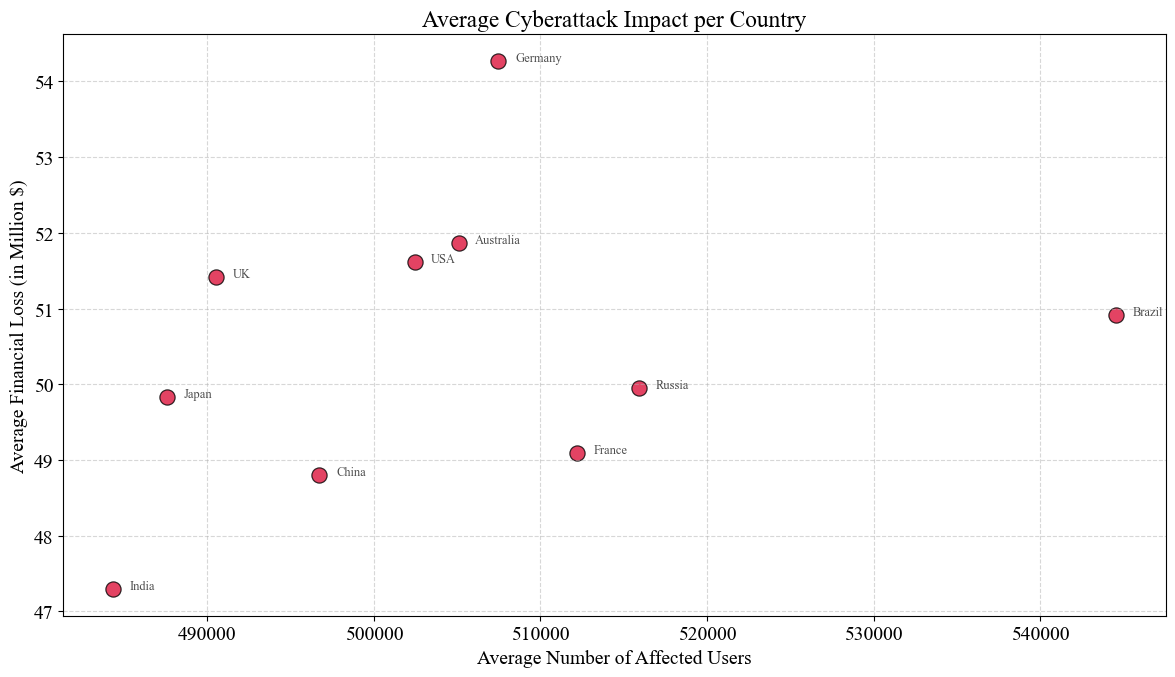

In [136]:

# Font
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 14})

# Ensure numerical columns are properly converted
df['Financial Loss (in Million $)'] = pd.to_numeric(df['Financial Loss (in Million $)'], errors='coerce')
df['Number of Affected Users'] = pd.to_numeric(df['Number of Affected Users'], errors='coerce')

# Drop rows with missing values in critical columns
df.dropna(subset=['Country', 'Financial Loss (in Million $)', 'Number of Affected Users'], inplace=True)

# Group by country to compute the average impact metrics
grouped = df.groupby('Country').agg({
    'Number of Affected Users': 'mean',                     # Average affected users
    'Financial Loss (in Million $)': 'mean'                 # Average financial loss
}).reset_index()

# Create scatter plot to visualize country-wise impact
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=grouped,
    x='Number of Affected Users',
    y='Financial Loss (in Million $)',
    color='crimson',
    s=120,               # Size of points
    edgecolor='black',
    alpha=0.8            # Transparency of points
)

# Annotate each data point with country name
for _, row in grouped.iterrows():
    plt.text(
        row['Number of Affected Users'] + 1000,                 # Slight horizontal shift
        row['Financial Loss (in Million $)'],
        row['Country'],
        fontsize=9,
        alpha=0.7
    )

# Add plot title and axis labels
plt.title("Average Cyberattack Impact per Country")
plt.xlabel("Average Number of Affected Users")
plt.ylabel("Average Financial Loss (in Million $)")

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to avoid clipping
plt.tight_layout()

# Save the figure with your name and plot type
plt.savefig("Chakar_Scatter_CyberImpact.png", dpi=300)

# Display the plot
plt.show()


## Insight: Average Cyberattack Impact per Country

### Purpose of the Visualization

This scatter plot provides a comparison of the average scale and financial severity of cyberattacks experienced by various countries. The x-axis shows the average number of users affected per incident, while the y-axis represents the average financial loss in millions of dollars. Each point on the chart represents a country, and its position reflects the combined impact of user exposure and monetary damage on a per-incident basis.

The goal of this visualization is to identify which countries tend to experience more damaging attacks, not by frequency, but by the typical severity of each incident.

### Understanding the Derived Data

To create this chart, the data was grouped by country and then averaged for two key metrics:
- The number of users affected by incidents
- The financial loss per attack

These are not total counts, but per-incident averages. This approach allows for a fairer comparison across countries, regardless of how many attacks each has experienced. It focuses on the typical impact when an incident occurs.

### Interpretation of Scatter Plot

Germany has the highest average financial loss, suggesting that the attacks it experiences are especially costly. Brazil shows the highest average number of users affected, which could imply large scale breaches even if they are less frequent. In contrast, India has the lowest average impact in both categories, which might indicate more contained or less severe incidents.

The United States, United Kingdom, and Australia fall somewhere in the middle, with moderate averages for both financial loss and user exposure. France and Russia also exhibit mid-level values, with France skewing slightly lower in loss but higher in affected users.

This chart also helps distinguish between countries that experience high-cost but smaller-scale incidents, and those that face broader but less financially intense breaches.

### Importance

Understanding average impact metrics offers a more nuanced view than simply tracking how many attacks a country experiences. For security analysts and policy makers, this can help:
- Identify which countries need to improve defenses for high value targets
- Prioritize investment in response and recovery systems
- Evaluate whether current protections are effectively limiting damage per incident

In practical terms, this view supports decision making that focuses on minimizing the impact of attacks, rather than just their frequency.

### Key Takeaways

- Germany experiences the highest average financial loss per incident.
- Brazil has the largest average number of users affected.
- India consistently reports the lowest average impact across both dimensions.
- Most countries cluster toward the center of the plot, indicating moderate severity, with a few notable outliers.

### Conclusion

This visualization highlights how the experience of cyberattacks varies across countries. Some face high scale breaches with lower direct costs, while others deal with fewer but more damaging incidents. Recognizing these patterns is essential for tailoring cybersecurity strategies and allocating resources where they can make the most difference.
